# <span style="color:green">1. Introduction to Probability.</span>


## Random Variable

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import scipy 
import sympy as sp

from collections import defaultdict 

- What is the probability that the sum of two independent dice equals sevens ?

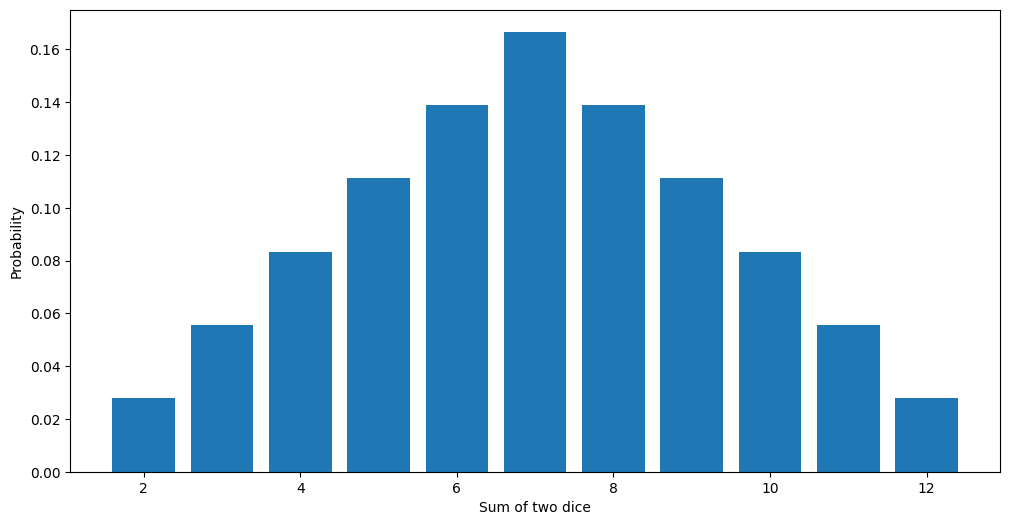

In [3]:
d = {(i, j) : i + j for i in range(1, 7) for j in range(1,7)}
dinv = defaultdict(list)

for i, j in d.items() : 
    dinv[j].append(i)


prefix_X = {i : len(j) / 36 for i, j in dinv.items()}

plt.figure(figsize=(12, 6))
plt.bar(prefix_X.keys(), prefix_X.values())
plt.xlabel('Sum of two dice')
plt.ylabel('Probability')
plt.show()

- What is the probability that the haft the product of three dice will exceed their sum ? 

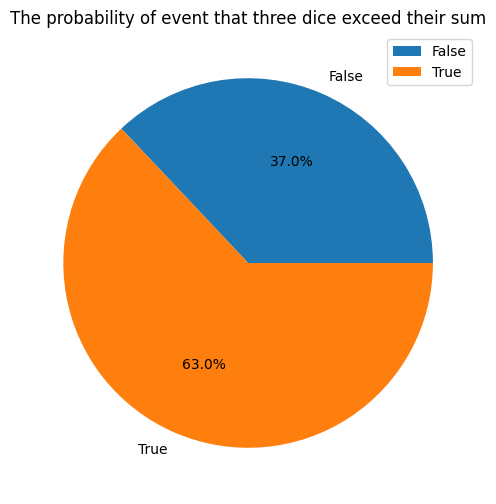

In [4]:
d = {(i, j, k) : (i + j + k) < (i * j * k) / 2 for i in range(1,7) for j in range(1,7) for k in range(1,7) }

dinv = defaultdict(list)
for i, j in d.items() :
    dinv[j].append(i)

prefix_X = {i : len(j) / 6**3 for i, j in dinv.items()}
plt.figure(figsize=(12, 6))
plt.pie(prefix_X.values(), labels= prefix_X.keys(), autopct='%1.1f%%')
plt.legend()
plt.title("The probability of event that three dice exceed their sum")
plt.show()


- Consider the first problem with two dice, if one of the dice is no longer fair and distribution for the unfair dice is $$P(1) = P(2) = P(3) = \frac 1 9 $$ $$ P(4) = P(5) = P(6) = \frac 2 9 $$ What is the probability that the sum of two dice is seven ?   

In [5]:
df  = pd.DataFrame(index = [(i, j) for i in range(1,7) for j in range(1,7)], 
                   columns = ['sum', 'd1', 'd2', 'pd1', 'pd2'])
df['d1'] = [i[0] for i in df.index]
df['d2'] = [i[1] for i in df.index]
df['sum'] = df['d1'] + df['d2']
df.head()

,sum,d1,d2,pd1,pd2
"(1, 1)",2,1,1,NaN,NaN
"(1, 2)",3,1,2,NaN,NaN
"(1, 3)",4,1,3,NaN,NaN
"(1, 4)",5,1,4,NaN,NaN
"(1, 5)",6,1,5,NaN,NaN


In [6]:
def pr_1 (x) : 
    if x <= 3 : return  1 / 9 
    return 2 / 9

df['pd1'] = [pr_1(i) for i in df['d2']]
df['pd2'] = 1/6 * df['pd1']

df.groupby(by = "sum").sum()["pd2"]

sum
2     0.018519
3     0.037037
4     0.055556
5     0.092593
6     0.129630
7     0.166667
8     0.148148
9     0.129630
10    0.111111
11    0.074074
12    0.037037
Name: pd2, dtype: float64

## Continuous Random Variables 

- Suppose a random variable X is uniformaly distributed on the unit interval. What is the probability that the variable takes on  values less than 1/2 ? 

In [7]:
from sympy import integrate
x = sp.symbols('x')
pro = integrate(1, (x, 0, 0.5))
print(pro)

0.500000000000000


- Suppose that $ Y = 2X$. What is the probability that $$ 0 < Y < \frac 1 2 $$  
- To solve this problem, we write $$ Y : [0, 1] \rightarrow [0, 2]$$ so $$ P_y : [0, 2] \rightarrow [0,1] $$

In [8]:
pro = integrate(1, (x, 0, 1/4))
print(pro)

0.250000000000000


## Transformation of Variables Beyond Calculus

- Suppose X and Y are uniformaly distributed in the unit interval, we define Z as : $$ Z = \frac X {Y - X} $$ What is the $ f_Z(z) $ ?

- To solve this problem, consider the set $ \{0 < Z < z\} $ and we want to compute : $$ P(Z < z) = \int \int B_1 dXdY $$ with $ B_1 = \{0 < Z < z\} $
- We have a equality : $$ Y = \frac X Z + X $$ 
- If $ z > 0 \rightarrow Y \in [X(\frac 1 z + 1) , 1] , X \in [0, \frac z {z + 1}] $ 


In [9]:
from sympy import simplify, init_printing

x, y, z = sp.symbols('x y z')
init_printing()
right_density_func = integrate(1, (y, x * (1/z + 1),1 ), (x, 0, z / (1 + z)))

simplify(right_density_func)

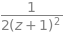

In [10]:
# compute fz where z > 0 
from sympy import diff
f_z_right = diff(right_density_func, z)
simplify(f_z_right)

- If $ Z < -1 \rightarrow Y \in [X (\frac 1 z + 1), X], X \in [0, 1] $

In [11]:
left_density_func = integrate(1, (y, x * (1/z + 1), x), (x, 0, 1))
simplify(left_density_func)

In [12]:
f_z_left = diff(left_density_func, z)
simplify(f_z_left)

## Independent Random Variables

- Give X and Y are random variables. X and Y are independence when $$  P(X,Y) = P(X)P(Y) $$
- X and Y are uncorrlelated when : $$ E[X - \bar X]E[Y - \bar Y] = 0 $$

- Consider the discrete random variables X and Y where : $$ X = \begin{cases} 1 \ if \ \omega = 1 \\ 0 \ if \ \omega = 2 \\ -1 \ if \ \omega = 3 \end{cases} $$ and also : $$ Y = \begin{cases} 0 \ if \ \omega = 1 \\ 1 \ if \ \omega = 2 \\ 0 \ if \ \omega = 3 \end{cases} $$

In [13]:
X = [1, 0, -1]
Y = [0, 1, 0]
S = []
for i in range(len(X)) : 
    S.append((X[i], Y[i]))

def compute_PXY(i, j, S) :
    if (i, j) in S : return 1 / len(S)
    return 0 

df = pd.DataFrame(index = [(i, j) for i in range(-1, 2) for j in range(0, 2)], 
                  columns = [ 'X', 'Y', 'PX', 'PY', 'PX*PY', 'PXY'])

df['PX'] = [X.count(i) / len(X) for i, j in df.index]
df['PY'] = [Y.count(i) / len(Y) for i , j in df.index]
df['PX*PY'] = df['PX'] * df['PY']
df['PXY'] = [compute_PXY(i, j, S) for i, j in df.index]
df['X'] = [i for i, j in df.index]
df['Y'] = [j for i, j in df.index]


In [14]:
df

,X,Y,PX,PY,PX*PY,PXY
"(-1, 0)",-1,0,0.333333,0.000000,0.000000,0.333333
"(-1, 1)",-1,1,0.333333,0.000000,0.000000,0.000000
"(0, 0)",0,0,0.333333,0.666667,0.222222,0.000000
"(0, 1)",0,1,0.333333,0.666667,0.222222,0.333333
"(1, 0)",1,0,0.333333,0.333333,0.111111,0.333333
"(1, 1)",1,1,0.333333,0.333333,0.111111,0.000000


In [15]:
# Uncorrelated = 0
print(df['X'].mean())
print(df['Y'].mean())

0.0
0.5


- Consider two independent Bernoulli-distributed random variables $ X_1, X_2 \in {0, 1} $ and we defind $ Z = X_1 + X_2 $ Check $X_1$ and $X_2$ are independent after conditioning on Z ?
- $ \Rightarrow $ They are dependent

In [16]:
df = pd.DataFrame(index = [(i, j) for i in range(0, 2) for j in range(0, 2)], 
                  columns = ['X', 'Y','Z', 'PX', 'PY', 'PZ', 'PXY', 'PXY|Z' ])

df['X'] = [i for i,j in df.index]
df['Y'] = [j for i, j in df.index]
df['Z'] = df['X'] + df['Y']
df['PX'] = [1/2 for _ in range(len(df.index))]
df['PY'] = [1/2 for _ in range(len(df.index))]

df['PZ'] = df['Z'].map(lambda z: df['Z'].value_counts()[z] / len(df))
df['PXY'] = df['PX'] * df['PY']


df['PXY|Z'] = df['PXY'] / df['PZ']

 
def find_condition_probability(x, y, df) : 

    distinct_count = df.groupby([x, y]).size().reset_index(name='count')

    df = pd.merge(df, distinct_count, on=[x,y], how='left')

    df['P' +x +'|Z'] = (df['count']/ 4) / df['PZ']

    df = df.drop(columns=['count'])
    return df

df = find_condition_probability('X', 'Z', df)
df = find_condition_probability('Y', 'Z', df)

df

,X,Y,Z,PX,PY,PZ,PXY,PXY|Z,PX|Z,PY|Z
0,0,0,0,0.5,0.5,0.25,0.25,1.0,1.0,1.0
1,0,1,1,0.5,0.5,0.50,0.25,0.5,0.5,0.5
2,1,0,1,0.5,0.5,0.50,0.25,0.5,0.5,0.5
3,1,1,2,0.5,0.5,0.25,0.25,1.0,1.0,1.0


- Conditioning on Z can make two  dependent variable $X, Y$ independent. Consider the $ Z_n = \sum^n _i X_i $ with $X_i$ independent. Is $Z$ independent ? (check the book)

## Classic Broken Rob
- Ex : given a rod of unit-lenght, broken independently and randomly at two place, what is the probability that you can assemble the three reamining pieces into a triangle ?

- Set X and Y are independent and uniformaly distributed in the unit interval. We have : $$ a = X , b = Y - X , c = 1 - Y$$ with $a, b, c$ is a edge of triangle. 
- With the condition of three edge of triangle, we can limit the value of X and Y : $$ \{ 0 <  X < \frac 1 2 , \frac 1 2 < Y < \frac 1 2 + X \} $$ with  $ Y > X$ 

In [17]:
P_triangle_exists = integrate(1, (y, 1/2, 1/2 + x), (x, 0, 1/2))
P_triangle_exists  *= 2
P_triangle_exists

In [18]:
# another version using numpy - approx approach
x_val , y_val = np.random.rand(2, 1000)
a,b,c = x_val, (y_val-x_val), 1-y_val
s = (a + b + c) /2 
np.mean((s>a) & (s>b) & (s > c) & (y_val > x_val)) 

# <span style="color:skyblue">2. Projection Methods.</span>


- The concept of projection is key to developing an intuition about conditional probability. The purpose of this method is find a point on a given line that is closest to the given point. 



![Local Image](./Image/project_method_1.png)

- We need to find the x - position, set $ \vec x = \alpha \vec v$ with v is  the subspace onto which we want to project y. Because vector y - x is perpedicular to the line so we have : $$ (\vec y - \vec x) \vec v = 0 \\ \Leftrightarrow \vec y  \vec v - \alpha \vec v \vec v = 0 \\ \Leftrightarrow \alpha = \frac{\vec y \vec v}{ \vec v \vec v} \\ \Rightarrow \vec x = \frac{\vec y \vec v}{ \vec v \vec v} \vec v $$

# 3. Conditional Expectation as Projection
- Ta sẽ xem xét dựa trên việc ước tính giá trị nhỏ nhất của MSE, nếu giả sử $h(Y) $ là một phép chiếu từ không gian Y sang X, việc hiệu $ |X - h(Y)| $ phải là một số nhỏ nhất có thể. Theo phép chiếu, nếu ta coi X là một điểm ngoài muốn chiếu vào không gian Y, điểm chiếu là h(Y) thì khi đó tích vô hướng $ (X - h(Y) Y) $ là 0 hay chúng phải vuông góc với nhau
- Hơn thế nữa, nếu xét tính tích vô hướng như việc tính giá trị mean cho các biến ngẫu nhiên khi đó ta có đẳng thức : $$ E(X - h(Y), Y) = 0$$. 
- Dựa vào việc tính toán trước ta thấy với $ h(Y) = E[X|Y] $ thì khoảng cách là nhỏ nhất 
- Khi đó ta có đẳng thức : $$ E(X - E[X|Y], Y) = 0 $$

- Consider the probability density $ f_{x,y} = x + y $ with $(x, y) \in [0, 1]^2 $. Compute the conditional expectation ?

In [20]:
# straight from the definitation : 

f_y = integrate(x + y , (x, 0, 1))

straight = integrate (x * (x + y) / f_y, (x, 0, 1))

f_y

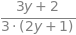

In [22]:
simplify(straight)

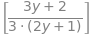

In [26]:
# inner product 
from sympy import solve
h_y = sp.symbols('h_y')
inner = integrate((x - h_y)*y*(x + y), (x, 0, 1) )
solve(inner, h_y)

- Verify the equality : $$ E(X - E(X|Y)) ^2 = E(X)^2 - E(E(X|Y))^2 $$

In [28]:
fxy = x + y 
fy = integrate(fxy, (x, 0, 1))
fx = integrate(fxy, (y, 0, 1))

LHS = integrate((x - straight)**2 * fxy, (x, 0, 1), (y, 0 , 1))
LHS

In [29]:
RHS = integrate(x**2 * fx, (x, 0, 1)) - integrate(straight ** 2 * fy, (y, 0, 1) )
RHS